# Indicators

With this code, you can programatically download any indicator available in [ESIOS REE website](https://www.esios.ree.es/).

## Token

First, you need to get a token by sending an email to [ESIOS REE](mailto:consultasios@ree.es) asking for it.

Once they send you the token, paste it in the `TOKEN` variable.

In [1]:
TOKEN = "<YOUR TOKEN>"

## Instantiate the client

To work with the API, you need to instantiate the `Indicators` class with the token.

In [2]:
from esios.endpoints import Indicators
client = Indicators(TOKEN)

Now, you'll use the Python object as a client to interact with the API.

## Examples

### SPOT Price

To download the SPOT price, which is represented in the following page with the indicator `600`.

https://www.esios.ree.es/en/analysis/600

That's the `indicator_id` you need to pass to the `get` method.

In [4]:
data = client.get(indicator_id = 600)

Then, you use the `.to_dataframe()` method to convert the data to a pandas DataFrame.

In [5]:
df = data.to_dataframe()
df

,value,geo_id,geo_name
datetime,,,
2024-05-14 00:00:00+02:00,11.1,1,Portugal
2024-05-14 00:00:00+02:00,11.1,2,Francia
...,...,...,...
2024-05-14 23:00:00+02:00,59.0,8827,Bélgica
2024-05-14 23:00:00+02:00,100.0,8828,Países Bajos


And now you are ready to exploit the properties of the `pandas.DataFrame` and, for example, plot the data.

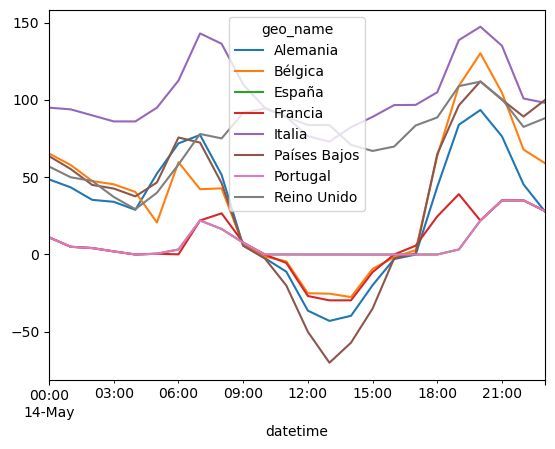

In [6]:
dff = df.reset_index()
dff = dff.pivot(index='datetime', columns='geo_name', values='value')
dff.plot.line();

Also, you could have filtered the data by dates.

In [9]:
data = client.get(indicator_id = 600, start_date='2024-01-01', end_date='2024-01-02')
df = data.to_dataframe()
df

,value,geo_id,geo_name
datetime,,,
2024-01-01 00:00:00+01:00,63.33,1,Portugal
2024-01-01 00:00:00+01:00,0.10,2,Francia
...,...,...,...
2024-01-02 23:00:00+01:00,26.83,8827,Bélgica
2024-01-02 23:00:00+01:00,54.90,8828,Países Bajos


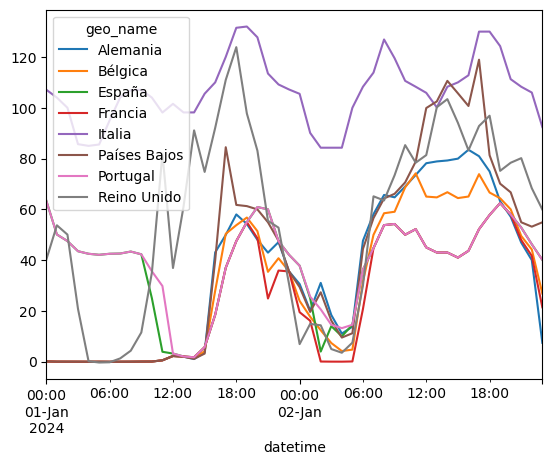

In [10]:
dff = df.reset_index()
dff = dff.pivot(index='datetime', columns='geo_name', values='value')
dff.plot.line();

### Cogeneration

https://www.esios.ree.es/en/analysis/87

In [13]:
data = client.get(indicator_id = 87)
df = data.to_dataframe(column_name='short_name')
df

,Gas Natural Cogeneración,geo_id,geo_name
datetime,,,
2024-05-14 00:00:00+02:00,407.025,8741,Península
2024-05-14 00:15:00+02:00,406.700,8741,Península
...,...,...,...
2024-05-14 23:30:00+02:00,424.225,8741,Península
2024-05-14 23:45:00+02:00,424.225,8741,Península


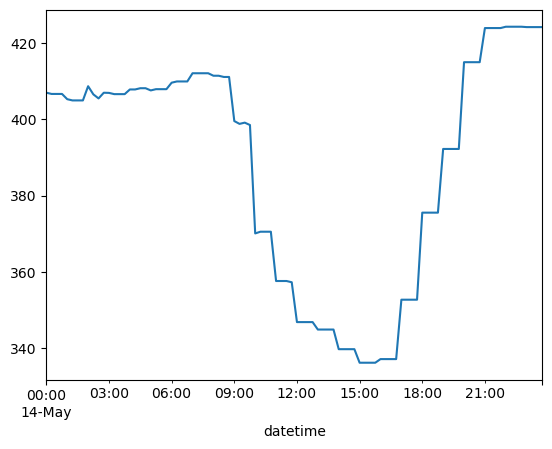

In [15]:
df['Gas Natural Cogeneración'].plot.line();